# **TASK 1**

# **FUNCTION DEFINITONS**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate random points in a given dimensional space
def random_points(num_points, num_dimensions):
    return np.random.randn(num_points, num_dimensions)

# Function to calculate the average distance of a selected point to all other points
def average_distance_sp(points, selected_point):
    distances = np.linalg.norm(points - selected_point, axis=1)
    return np.mean(distances)

def minimum_distance_sp(points, selected_point):
    points_without_selected = points[np.all(points != selected_point, axis=1)]
    distances = np.linalg.norm(points_without_selected - selected_point, axis=1)
    return np.min(distances)

# Function to calculate the closest-to-average ratio
def closest_to_average_ratio(min_dist, avg_dist):
    return min_dist / avg_dist


# **EXPERIMENTATION**

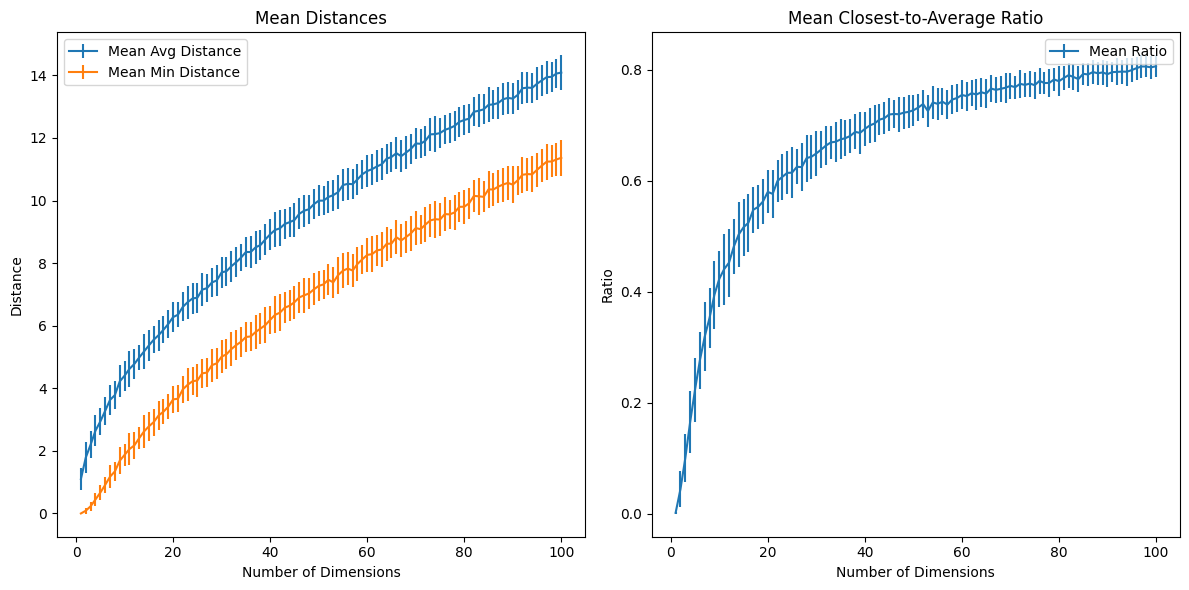

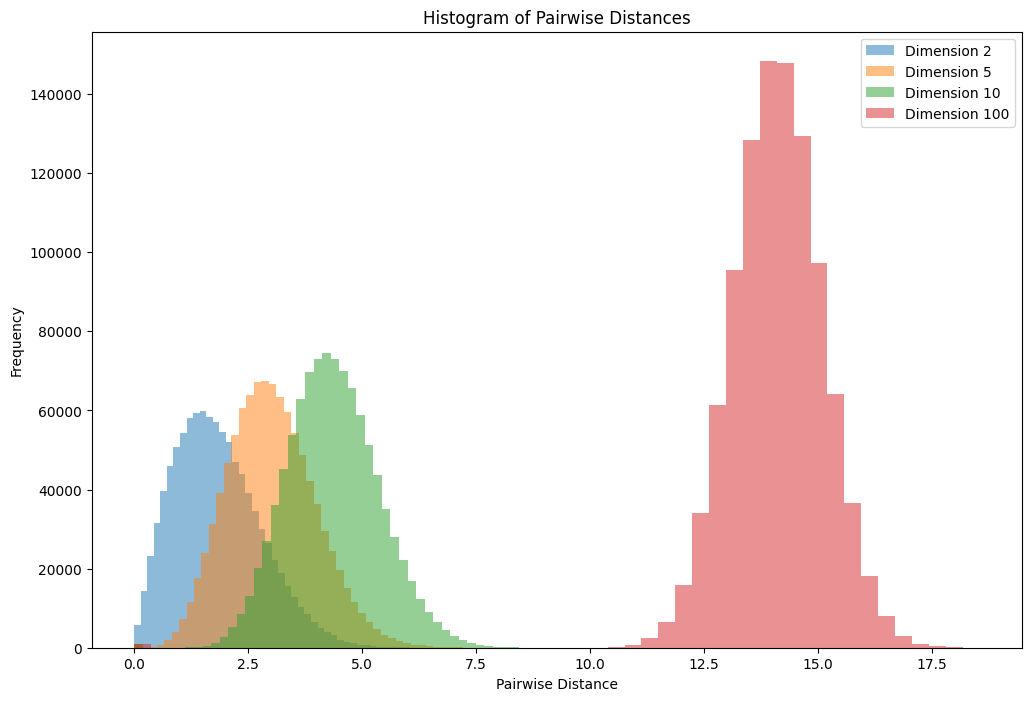

In [ ]:
# Experimentation and Visualization
dimensions = list(range(1, 101))

meanAvgDistances = []
meanMinDistances = []
meanRatios = []
stdAvgDistances = []
stdMinDistances = []
stdRatios = []

for d in dimensions:
    avgDistances = []
    minDistances = []
    ratios = []

    for i in range(100):
        dataPoints = random_points(1000, d)
        selectedPoint = dataPoints[np.random.randint(1000)]

        avgDist = average_distance_sp(dataPoints, selectedPoint)
        minDist = minimum_distance_sp(dataPoints, selectedPoint)
        ratio = closest_to_average_ratio(minDist, avgDist)

        avgDistances.append(avgDist)
        minDistances.append(minDist)
        ratios.append(ratio)

    meanAvgDistances.append(np.mean(avgDistances))
    meanMinDistances.append(np.mean(minDistances))
    meanRatios.append(np.mean(ratios))
    stdAvgDistances.append(np.std(avgDistances))
    stdMinDistances.append(np.std(minDistances))
    stdRatios.append(np.std(ratios))

# Plotting mean values with standard deviations
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.errorbar(dimensions, meanAvgDistances, yerr=stdAvgDistances, label='Mean Avg Distance')
plt.errorbar(dimensions, meanMinDistances, yerr=stdMinDistances, label='Mean Min Distance')
plt.xlabel('Number of Dimensions')
plt.ylabel('Distance')
plt.legend()
plt.title('Mean Distances')

plt.subplot(1, 2, 2)
plt.errorbar(dimensions, meanRatios, yerr=stdRatios, label='Mean Ratio')
plt.xlabel('Number of Dimensions')
plt.ylabel('Ratio')
plt.legend()
plt.title('Mean Closest-to-Average Ratio')

plt.tight_layout()
plt.show()

# Histogram of pairwise distances for selected dimensions
selected_dimensions = [2, 5, 10, 100]
plt.figure(figsize=(12, 8))

for d in selected_dimensions:
    dataPoints = random_points(1000, d)
    pairwiseDistances = np.linalg.norm(dataPoints[:, np.newaxis, :] - dataPoints, axis=2)
    np.fill_diagonal(pairwiseDistances, 0)  # Set diagonal values to 0 to exclude self-distances

    plt.hist(pairwiseDistances.flatten(), bins=50, alpha=0.5, label=f'Dimension {d}')

plt.xlabel('Pairwise Distance')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Pairwise Distances')
plt.show()


As the number of dimensions is increased the the distance between closest neighbourhood and the furthest neighbourhood is decreasing. As we see in second graph ratio is aproximating to 1. Third graph shows that some distances become more frequent than others. This is called curse of dimensionality.

"The common theme of these problems is that when the dimensionality increases, the volume of the space increases so fast that the available data become sparse. In order to obtain a reliable result, the amount of data needed often grows exponentially with the dimensionality."^1

1 https://en.wikipedia.org/wiki/Curse_of_dimensionality

# **INITIALIZATION**

In [ ]:
import random
import numpy as np

# LOADING **DATA**

In [ ]:
import keras
(X_train, Y_train), (X_test, Y_test) = keras.datasets.fashion_mnist.load_data()

# **RESHAPING**

In [ ]:
X_test = X_test.reshape(X_test.shape[0], -1)
X_train = X_train.reshape(X_train.shape[0], -1)

# **SHUFFELING AND SPLITTING**

In [ ]:
from sklearn.utils import shuffle
# Shuffle the training data
X_train_shuffled, Y_train_shuffled = shuffle(X_train, Y_train)

# Split %80 train - 20% val
X_training, X_validation = np.split(X_train_shuffled, [int(len(X_train_shuffled) * 0.8)])
Y_training, Y_validation = np.split(Y_train_shuffled, [int(len(Y_train_shuffled) * 0.8)])


# TRAINING k-NN **CCLASSIFIER**

In [ ]:
# plot train acc and test acc with different k
import sklearn
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


k_values = [1,3,7,12,20,30,50,75,100]
test_acc_values = []

for i in k_values:
  knn = KNN(n_neighbors=i)
  knn.fit(X_training, Y_training)
  y_pred = knn.predict(X_validation)
  test_acc = accuracy_score(Y_validation, y_pred)
  test_acc_values.append(test_acc)
  print('Test accuracy of KNN with k={}: {:.3f}'.format(i, test_acc))


Test accuracy of KNN with k=1: 0.845
Test accuracy of KNN with k=3: 0.850
Test accuracy of KNN with k=7: 0.851
Test accuracy of KNN with k=12: 0.846
Test accuracy of KNN with k=20: 0.841
Test accuracy of KNN with k=30: 0.833
Test accuracy of KNN with k=50: 0.827
Test accuracy of KNN with k=75: 0.818
Test accuracy of KNN with k=100: 0.813


# **PLOTTING ACCURACY**

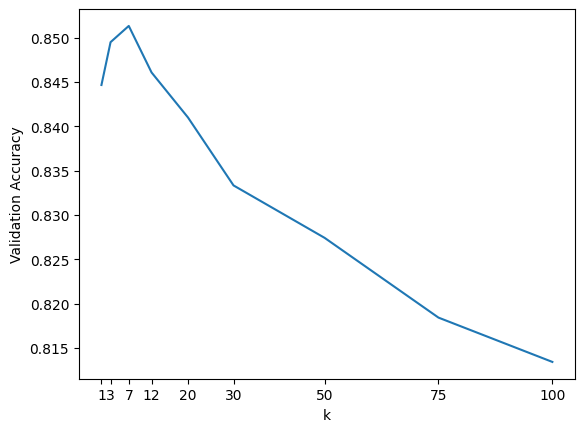

In [ ]:
plt.plot(k_values,test_acc_values)
plt.xticks(k_values)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.show()

# **TESTING ON TEST SET**

In [ ]:

finalClassifier = KNN(n_neighbors=7)
X_combined = np.concatenate((X_training, X_validation), axis=0)
Y_combined = np.concatenate((Y_training, Y_validation), axis=0)
finalClassifier.fit(X_combined, Y_combined)
Y_prediction = finalClassifier.predict(X_test)
score = accuracy_score(Y_test, Y_prediction)
print('Test accuracy for k =', 7, ':', score)

Test accuracy for k = 7 : 0.854


# CONFUSION **MATRIX**

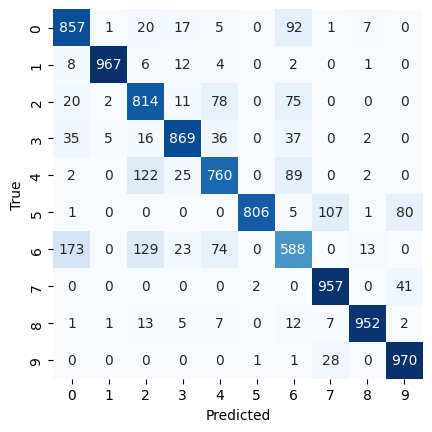

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test,Y_prediction)


# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



As we can see from the confusion matrix most mistaken class label is 2. 4th and 6th classes are confused with class 2 often. 6th class is also confused with classes 0 and 4. Also, algorithm predicts 6 for a lot of different classes. Another bad example is class 5. It is confused with 7th and 9th classes.

  Algortihm show some good work on classes 9,8,7 and 1. These classes have
accuracy higher than 0.95.